In [1]:
import numpy as np

In [2]:
cones = [
    [1.85844328, -19.33753632, 3.0, 0.7061382],
    [2.12849187, -17.45331111, 3.0, 0.76776551],
    [2.57394494, -15.60371869, 3.0, 0.74499976],
    [3.19079674, -13.80215222, 3.0, 0.74794124],
    [3.97023274, -12.07025125, 3.0, 0.81150282],
    [4.90804474, -10.41376764, 3.0, 0.82671902],
    [5.66088872, -8.72349226, 3.0, 0.72426541],
    [5.90833204, -6.88947401, 3.0, 0.87854583],
    [5.62830519, -5.06024729, 3.0, 0.84320715],
    [4.84203383, -3.38617496, 3.0, 0.7643888],
    [3.61895913, -1.99763497, 3.0, 0.72241595],
    [2.05360777, -1.01244862, 3.0, 0.88866094],
    [0.2728444, -0.50806865, 3.0, 0.8863489],
    [7.06087551, -18.28892629, 2.0, 0.89996013],
    [7.5407376, -16.47182176, 2.0, 0.73041819],
    [8.23677964, -14.72582811, 2.0, 0.85831636],
    [9.13972114, -13.07675034, 2.0, 0.71911304],
    [10.0160143, -11.3905207, 2.0, 0.76502316],
    [10.60168947, -9.58448286,2.0, 0.70826409],
    [10.88316488, -7.7071674, 2.0, 0.81210634],
    [10.85028075, -5.80653857, 2.0, 0.81692991],
    [10.50717653, -3.93892093, 2.0, 0.82639325],
    [9.85869466, -2.15350451, 2.0, 0.71564905],
    [8.92780575, -0.50021769, 2.0, 0.70619499],
    [7.73517194, 0.9796313, 2.0, 0.88614058],
    [6.3165248, 2.24270765, 2.0, 0.82546622],
    [4.70903561, 3.2544351, 2.0, 0.79764269],
    [2.95688792, 3.9881141, 2.0, 0.88575413],
    [1.11003903, 4.4238484, 2.0, 0.82517468],
]
cones = np.array(cones)

In [3]:
from full_pipeline.full_pipeline import PathCalculationInput,PathPlanner
from utils.cone_types import ConeTypes

In [4]:
cones_input = [np.zeros((0, 2)) for _ in ConeTypes]
for cone in cones:
    if cone[2] == 0:
        cones_input[ConeTypes.BLUE] = np.vstack((cones_input[ConeTypes.BLUE], cone[:2]))
    elif cone[2] == 1:
        cones_input[ConeTypes.YELLOW] = np.vstack((cones_input[ConeTypes.YELLOW], cone[:2]))
    else:
        cones_input[ConeTypes.UNKNOWN] = np.vstack((cones_input[ConeTypes.UNKNOWN], cone[:2]))

carPosition = np.array([5, -15])
carDirection = 1.5

pathPlanner = PathPlanner()
path = pathPlanner.calculatePathInGlobalFrame(
    vehiclePosition= carPosition,
    vehicleDirection= carDirection,
    cones= cones_input
)

[41]
[0]
[35]
[0]


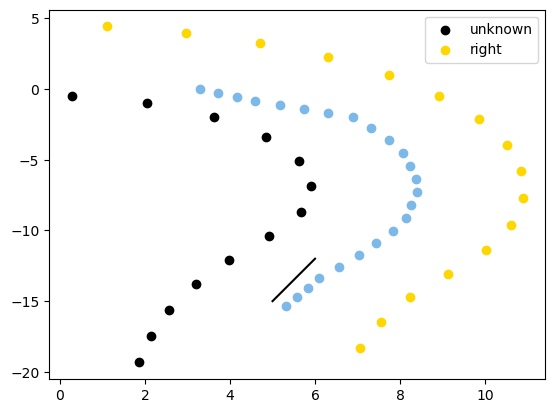

In [5]:
import matplotlib.pyplot as plt
plt.scatter(cones[:13, 0], cones[:13, 1], c="k", label="unknown")
plt.scatter(cones[13:, 0], cones[13:, 1], c="gold", label="right")
plt.legend()
plt.plot(
    [carPosition[0], carPosition[0] + 1],
    [carPosition[1], carPosition[1] + 3],
    c="k",
)
plt.scatter(path[:, 0], path[:, 1], c="#7CB9E8", label="left")

In [13]:
from full_pipeline.full_pipeline import PathCalculationInput,PathPlanner
from utils.cone_types import ConeTypes
from planning_sim_tester import SimConfig
from planning_sim_tester import Simulator
from planning_sim_tester import Track, TrackConfig
import numpy as np
import matplotlib.pyplot as plt
import time

final_cones = None


class PlannerWrapper:
    def __init__(self):
        self.counter = 0

    def getPath(self, cones, verbose=False):
        global final_cones
        final_cones = cones

        cones_input = [np.zeros((0, 2)) for _ in ConeTypes]
        for cone in cones:
            if cone[2] == 0:
                cones_input[ConeTypes.BLUE] = np.vstack((cones_input[ConeTypes.BLUE], cone[:2]))
            elif cone[2] == 1:
                cones_input[ConeTypes.YELLOW] = np.vstack((cones_input[ConeTypes.YELLOW], cone[:2]))
            else:
                cones_input[ConeTypes.UNKNOWN] = np.vstack((cones_input[ConeTypes.UNKNOWN], cone[:2]))

        carPosition = np.array([0, 0])
        carDirection = 0

        pathPlanner = PathPlanner()
        path = pathPlanner.calculatePathInGlobalFrame(
            vehiclePosition= carPosition,
            vehicleDirection= carDirection,
            cones= cones_input
        )

        plt.scatter(cones_input[ConeTypes.BLUE][:,0], cones_input[ConeTypes.BLUE][:,1], c="#7CB9E8", label="left")
        plt.scatter(cones_input[ConeTypes.YELLOW][:,0], cones_input[ConeTypes.YELLOW][:,1], c="gold", label="right")
        plt.plot(
            [carPosition[0], carPosition[0] + 1],
            [carPosition[1], carPosition[1]],
            c="k",
        )
        plt.scatter(path[:, 0], path[:, 1], c="#000000", label="path")
        plt.legend()
        plt.savefig(f"{self.counter}_test_0.png")

        plt.clf()
        self.counter += 1
        return path


crns = np.array([False, True, True, False, True, True, True, False, True, True, False], dtype=bool)
delTh = np.array(
    [0, np.pi / 2, np.pi / 2, 0, np.pi / 2, np.pi / 2, np.pi / 2, 0, np.pi / 4, np.pi / 4, 0],
    dtype=float,
)
lpar = np.array([20, 10, -10, 20, 10, -10, 10, 200, -10, 10, 200], dtype=float)
track = Track(TrackConfig(), crns)
track.solve(lpar, delTh, case=0)
aveDist = 2
track.plot(cones=True, aveDist=aveDist)

simulator = Simulator(SimConfig(), track)
out = simulator.run(PlannerWrapper)

print(out, simulator.losses)
print(final_cones)

planner_wrapper = PlannerWrapper()
planner_wrapper.getPath(final_cones, True)


[42]
[0]
[39]
[1]
[35]
[0]
[34]
[1]
[44]
[0]
[37 43]
[1 1]
[41]
[0]
[38]
[0]
[35]
[0]
[27 32]
[0 0]
[47]
[0]
[41]
[0]
[36]
[0]
[40]
[0]
[37]
[0]
[37]
[0]
[44]
[0]
[40]
[0]
[41]
[0]
[33 31]
[0 0]
[31 34 34 38]
[0 0 0 0]
[30]
[0]
[43]
[0]
[37]
[0]
[50]
[0]
[37]
[0]
[46]
[0]
[37]
[0]
[42]
[0]
[39]
[0]
[39]
[0]
[43]
[0]
[50]
[0]
[24]
[0]
[37]
[0]
[42]
[0]
[43]
[0]
[38]
[0]
[42]
[0]
[37]
[0]
[38]
[0]
[42]
[0]
[41 46]
[0 0]
[44]
[0]
[44]
[0]
[43 41]
[0 0]
[46]
[0]
[34]
[0]
[46]
[0]
[34]
[0]
[39]
[0]
[45]
[0]
[42]
[0]
[44]
[0]
[46]
[0]
[33]
[0]
[32]
[0]
[40]
[0]
[40]
[0]
[38]
[0]
[36]
[0]
[38]
[0]
[36]
[0]
[36]
[0]
[36]
[0]
[42]
[0]
[44]
[0]
[44]
[0]
[44]
[0]
[26]
[0]
[25]
[0]
[25]
[0]
[35]
[0]
[35]
[0]
[39]
[0]
[39]
[0]
[33]
[0]
[32]
[0]
[34]
[0]
[33]
[0]
[41]
[3]
[41]
[0]
[27]
[2]
[21]
[0]
[34]
[4]
[33]
[0]
False [0.17129679594943056, 0.8891524441850872, 0.051245106958458554, 0.12030338208595427, 0.1459576069212055, 0.8339515667804542, 0.40686026098970723, 0.29460410604087917, 0.05863974167

array([[1.99959446e-01, 4.02741065e-03],
       [8.25990394e-01, 1.66363859e-02],
       [1.45202134e+00, 2.92453612e-02],
       [2.07805229e+00, 4.18543365e-02],
       [2.70408324e+00, 5.44633118e-02],
       [3.33011419e+00, 6.70722870e-02],
       [3.95614513e+00, 7.96812623e-02],
       [4.58217608e+00, 9.22902376e-02],
       [5.20820703e+00, 1.04899213e-01],
       [5.83423798e+00, 1.17508188e-01],
       [6.46026892e+00, 1.30117163e-01],
       [7.08629987e+00, 1.42726139e-01],
       [7.71233082e+00, 1.55335114e-01],
       [8.33836177e+00, 1.67944089e-01],
       [8.96439272e+00, 1.80553065e-01],
       [9.59042366e+00, 1.93162040e-01],
       [1.02164546e+01, 2.05771015e-01],
       [1.08424856e+01, 2.18379990e-01],
       [1.14685165e+01, 2.30988966e-01],
       [1.20945475e+01, 2.43597941e-01],
       [1.27205784e+01, 2.56206916e-01],
       [1.33466094e+01, 2.68815891e-01],
       [1.39726403e+01, 2.81424867e-01],
       [1.45986712e+01, 2.94033842e-01],
       [1.522470

<Figure size 640x480 with 0 Axes>